5.031.022-5, Guido Dinello

## 1. 1. Interpretación de vectores propios

Considerando la matriz

\begin{align}
        X = \begin{pmatrix}
        3 & 3 \\
        0 & 10 \\ 
        \end{pmatrix}.
    \end{align}

a. Visualice el vector $v = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$ en un gráfico. \
b. Visualice el vector resultante $ y = Xv $ en conjunto con v. \
c. Genere una matriz de datos D (100×2) usando dos simulaciones de normales N (0, 1). Represéntelas en un gráfico. \
d. Considerando que cada entrada de la matriz puede ser vista como un vector, multiplique la matriz de datos por la matriz X para obtener una nueva matriz transformada D ′ . Grafique los datos en conjunto,
diferenciando los colores de los datos de D y D ′ . \
e. Calcule los vectores propios de X y grafíquelos sobre el gráfico anterior. Interprete la relación entre
los vectores propios y como se distorsionan los datos al transformar D a D ′.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

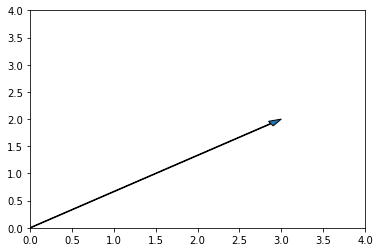

In [ ]:
v = np.array([3, 2])

# dibujar el vector como flecha
plt.arrow(0, 0, v[0], v[1], shape='full', width=0.01, head_width=0.1, length_includes_head='True')
# escala de ejes
plt.axis([0, 4, 0, 4])
# graficar
plt.show()

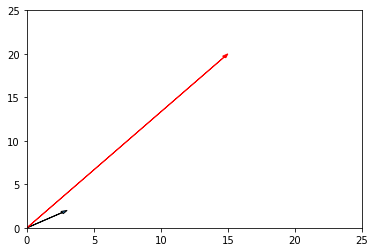

In [ ]:
X = np.array([[3, 3], [0, 10]])

# transformacion
y = np.dot(X,v)

plt.arrow(0, 0, v[0], v[1], shape='full', width=0.01, head_width=0.3, length_includes_head='True')
plt.arrow(0, 0, y[0], y[1], shape='full', width=0.01, head_width=0.3, length_includes_head='True', color='red')
plt.axis([0, 25, 0, 25])
plt.show()

In [ ]:
sim1 = np.random.normal(0, 1, 100)
sim2 = np.random.normal(0, 1, 100)

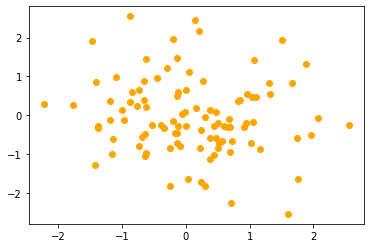

In [ ]:
# columna 1 de D corresponde al vector sim1 y columna 2 al vector sim2 
D = np.column_stack((sim1, sim2))

plt.scatter(D[:,0], D[:,1], color='orange')

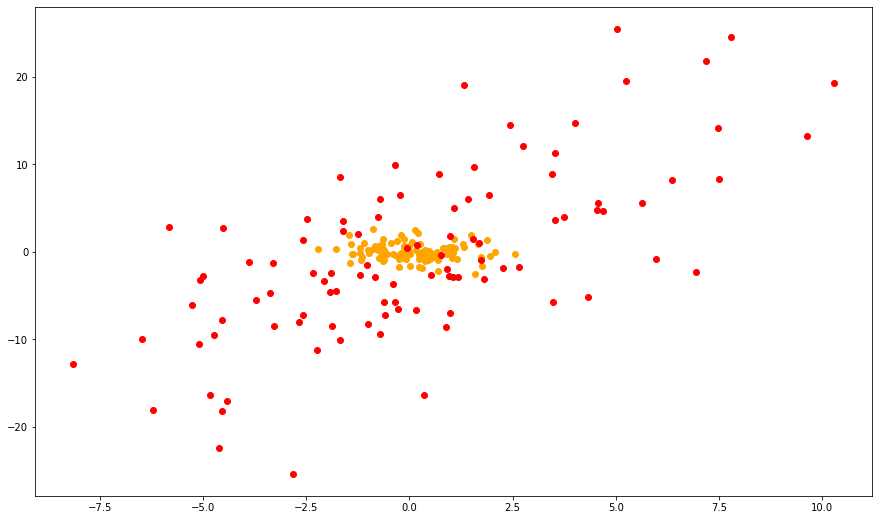

In [ ]:
Dprima = np.dot(X, np.transpose(D))

plt.figure(figsize=(15,9))
plt.scatter(D[:,0], D[:,1], c='orange')
plt.scatter(Dprima[0,:], Dprima[1,:], c='red')

# ## Elijo un subset random de puntos y ploteo con azul su original y con verde su transformado
# random_x = np.random.randint(0,100, size=5)
# plt.scatter(D[random_x,0], D[random_x,1], c="azul")
# plt.scatter(Dprima[0,random_x], Dprima[1,random_x], c="green")
# for x in random_x:
#   plt.arrow(D[x,0],D[x,1],Dprima[0,x]-D[x,0],Dprima[1,x]-D[x,1], shape='full',head_width=0.3,length_includes_head='False')
# ##

plt.show()

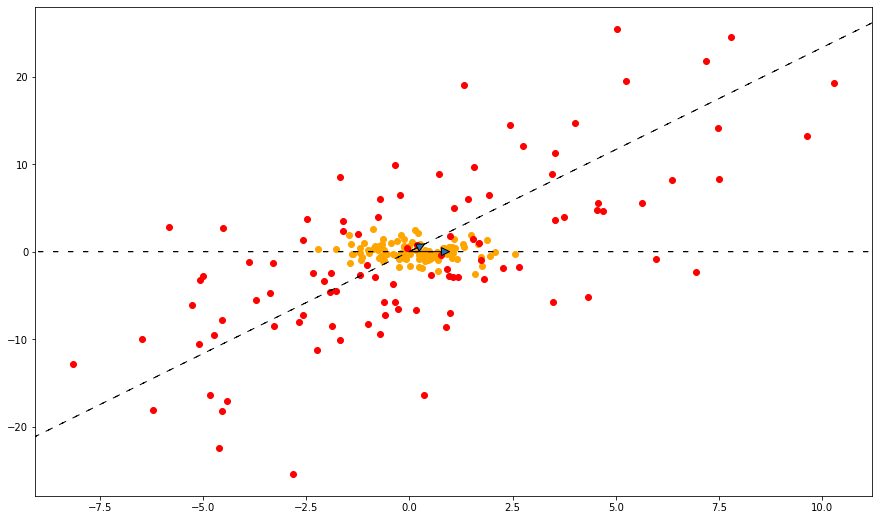

In [ ]:
valores_propios, vectores_propios = np.linalg.eig(X)

plt.figure(figsize=(15,9))
plt.scatter(D[:,0], D[:,1], c='orange')
plt.scatter(Dprima[0,:], Dprima[1,:], c='red')

# trasponemos para iterar sobre las filas
vectores_propios = np.transpose(vectores_propios)

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",shrinkA=0,shrinkB=0)

for vecp in vectores_propios:
  # Linea generada por el vector propio
  plt.arrow(-30*vecp[0],-30*vecp[1],60*vecp[0],60*vecp[1], linestyle=(0, (5, 10)))
  # Vector propio
  plt.annotate("", xy=(vecp[0], vecp[1]), xytext=(0,0), arrowprops=prop)

plt.show()

### Interpretacion

La primera y tal vez mas evidente observacion es el aumento en la dispersion de la nube de puntos. Los puntos rojos (asociados a $D'$) estan mucho mas esparcidos que los de color naranja (asociados a $D$), lo cual es congruente con el calculo de los valores propios de la matriz de transformacion $X$ ($\ \lambda_{1} = 10 , \lambda_{2} = 3 $) , puesto que ambos poseen una magnitud mayor que 0 es esperable tal efecto de expansion para cada vector (origen -> punto). \
Sin embargo, mas alla de la expansion tambien podemos observar que la forma de la nube cambio. Esto se debe a que los vectores tambien sufrieron una rotacion, a excepcion de aquellos vectores encontrados en el subespacio propio correspondiente a algun valor propio, es decir sobre la recta definida por algun vector propio.

\begin{align}
X * \vec{v} =
\begin{bmatrix}
    3  &  3  \\
    0  &  10      
\end{bmatrix}
*
\begin{bmatrix}
    a \\
    b      
\end{bmatrix} 
=
\begin{bmatrix}
    3a + 3b \\
    10b      
\end{bmatrix} 
=
\begin{bmatrix}
    a' \\
    b'      
\end{bmatrix} 
\end{align}

Sea $\theta'$ el angulo del vector transformado. \
$ \sin (\theta') = \frac{cat.opuesto}{hipotenusa}= \frac{b'}{\sqrt{a'^2+b'^2}} = \frac{10b}{\sqrt{(3a+3b)^2 + (10b)^2}}$\
Luego, 
$\ \theta'_{ \vec{v}=(a',b')} = \sin ^{-1} \left(\frac{10b}{\sqrt{(3a+3b)^2 + (10b)^2}}\right)$\
Y como, 
$\ \theta_{ \vec{v}=(a,b)} = \sin ^{-1} \left(\frac{b}{\sqrt{a^2+b^2}}\right) $\
Podemos observar que para cualquier vector multiplo de un vector propio la rotacion es nula: \

\begin{align}
\theta' - \theta_{ \vec{v}=k*(1,0) } = \sin ^{-1} \left(\frac{0}{(3k)^2}\right) - \sin ^{-1} \left(\frac{0}{k^2}\right) = 0 - 0 = 0
\end{align}
\begin{align}
\theta' - \theta_{ \vec{v}=k*(1,\frac{7}{3})} = \sin ^{-1} \left(\frac{70k/3}{\sqrt{(3k+7k)^2+(70k/3)^2}}\right)
 &- \sin ^{-1} \left(\frac{7k/3}{\sqrt{k^2+(7k/3)^2}}\right) = ... = \sin^{-1} \left(\frac{7}{\sqrt{58}}\right) - \sin^{-1} \left(\frac{7}{\sqrt{58}}\right) = 0
\end{align}





## 2. Implementación de PCA manual

a. Realice análisis de componentes principales utilizando los métodos dados en clase (sin usar las funciones prcomp o princomp). \
b. Coloree los puntos en las coordenadas de los primeros dos componentes según su especie.

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

species = {0:'setosa',1:'versicolor',2:'virginica'}
iris_target = pd.DataFrame(data=map(lambda x: species[x], iris.target), columns=['Species'])


### Metodo basado en las Covarianzas (Nube de Individuos)

#### Para encontrar la dirección de mejor representación, o lo que es equivalente de mayor variabilidad, debemos:

1. A partir de la matriz de datos calculamos la matriz de covarianzas S. En caso de que X esté centrada, el cálculo es simplemente $S = \frac{1}{I} X^{t} X $.
2. Hallamos la base de vectores propios $\{pc_{1}, ..., pc_{K} \}$ de S y los valores propios $ \lambda_{1} \geq \lambda_{2} \geq ... \geq \lambda_{K} ≥ 0 $.
3. La dirección óptima es $ u = ±pc_{1} $ .
4. Los valores proyectados en esta dirección se obtienen haciendo $ X pc_{1} $.


In [ ]:
# Obtenemos la matriz de datos desde el dataframe
X = iris_df

# Estandarizamos la matriz de datos X 
X_c = X - X.mean(axis=0)
X_std = X_c / X.std(axis=0, ddof=0) 

# Calculamos la matriz de covarianzas
I = X.shape[0]
S = (1/I) * np.dot(np.transpose(X_std), X_std)

# Hallamos la base de vectores propios de S y los valores propios asociados
Svalp, Svecp = np.linalg.eigh(S)

# Ordenamos Svalp y Svec de forma decreciente segun los valores propios
indices_ordenados = np.argsort(-Svalp)
Svalp = Svalp[indices_ordenados]
Svecp = Svecp[:,indices_ordenados]

# Proyectamos sobre pc1 para calcular el 1er factor
proyeccion_pc1 = np.dot(X_std, Svecp[:,0])
# Proyectamos sobre pc2 para calcular el 2do factor
proyeccion_pc2 = np.dot(X_std, Svecp[:,1])

# Construimos el dataframe con los puntos proyectados
pc12 = np.column_stack((proyeccion_pc1, proyeccion_pc2))
post_PCA_df = pd.DataFrame(data = pc12, columns = ['PC1', 'PC2'])
df_con_datos = pd.concat([post_PCA_df, iris_target], axis = 1)

### Metodo basado en Correlaciones (Nube de Variables)

In [ ]:
from math import sqrt

# Estandarizamos la matriz de datos
I = X.shape[0]
X_e = X_c / (sqrt(I) * X.std(axis=0, ddof=0))

# Calculamos los vectores propios de la matriz X_e * X_e.T
A = np.dot(X_e, np.transpose(X_e))
PCVal, PCVec = np.linalg.eigh(A)

# Ordenamos los vectores propios
indices_ordenados = np.argsort(-PCVal)
PCVal = PCVal[indices_ordenados]
PCVec = PCVec[:,indices_ordenados]

# Obtenemos las coordenadas de las variables en el plano generado por {v1, v2}
coord = np.dot(np.transpose(X_e), PCVec[:,0:2])

### Scatterplot con colores por especie

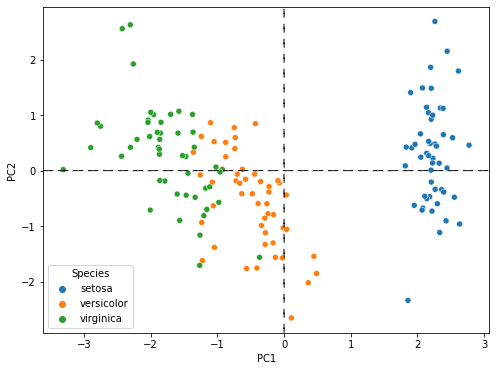

In [ ]:
plt.figure(figsize=(8, 6))

plt.arrow(-5,0,10,0, linestyle=(0, (5, 10)))
plt.arrow(0,-5,0,10, linestyle=(0, (5, 10)))

sns.scatterplot(data=df_con_datos, x='PC1', y='PC2', hue='Species')

In [ ]:
def biplot(score,coeff,labels=None):
  xs = score.iloc[:,0]
  ys = score.iloc[:,1]
  n = coeff.shape[0]
  scalex = 1.0/(xs.max() - xs.min())
  scaley = 1.0/(ys.max() - ys.min())
  xs = xs * scalex
  ys = ys * scaley
  scaled = np.column_stack((xs, ys))
  biplot_df = pd.DataFrame(data = scaled, columns = ['PC1', 'PC2'])
  biplot_target_df = pd.concat([biplot_df, iris_target], axis = 1)
  for i in range(n):
      plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
      if labels is None:
          plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
      else:
          plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

  plt.xlabel("PC{}".format(1))
  plt.ylabel("PC{}".format(2))
  plt.grid()

plt.figure(figsize=(12, 6))
biplot(post_PCA_df, np.transpose(post_PCA_df), iris.feature_names)

NameError: ignored

<Figure size 864x432 with 0 Axes>

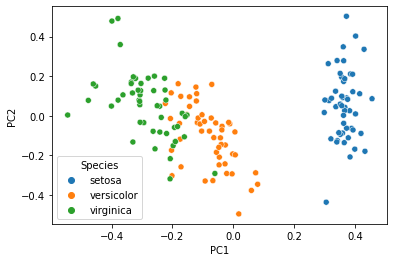

In [ ]:
sns.scatterplot(data=biplot_target_df, x='PC1', y='PC2', hue='Species')

# 3. Implementación PCA e interpretación

a. Realice análisis de componentes principales utilizando princomp o prcomp (en R).\
b. Grafique la nube de individuos en PC1 y PC2.\
c. Determine cuáles son las variables mas relevantes en los PC1 y PC2. Interprete los resultados.\
d. Grafique la nube de variables en los dos componentes principales y determine grupos de variables que
estén correlacionadas.\
e. Use la funcion pairs para observar correlaciones y compare con los resultados obtenidos en c.

In [ ]:
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# importacion del dataset
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
cars_df = pd.DataFrame(mtcars)

In [ ]:
cars_df[:,0]

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [ ]:
# Estandarizado
pre_PCA_std = StandardScaler().fit_transform(cars_df.values)

# Analisis de Componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(pre_PCA_std)

# Armado del nuevo DataFrame procesado
post_PCA_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

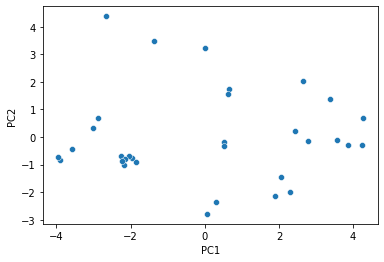

In [ ]:
# Grafico de la nube de individuos en PC1 y PC2
sns.scatterplot(data=post_PCA_df, x='PC1', y='PC2')

In [ ]:
# Matriz de Rotacion, cada xij es el Loading asociado a la vari de la PCj
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=cars_df.columns)
loadings

,PC1,PC2
mpg,0.362531,0.016124
cyl,-0.373916,0.043744
disp,-0.368185,-0.049324
hp,-0.330057,0.248784
drat,0.294151,0.274694
wt,-0.346103,-0.143038
qsec,0.200456,-0.463375
vs,0.306511,-0.231647
am,0.234943,0.429418
gear,0.206916,0.462349


## Variables mas relevantes en los PC1 y PC2. Interprete los resultados
Considerando que cada PC se puede expresar como combinacion lineal de las variables originales en la siguiente forma: \


> \begin{align}
PC_{i} = \sum_{j=1}^{K} var_{j}*\phi_{ji}
\end{align}
, donde cada $\phi_{ji}$ es el elemento de la fila $j$ y columna $i$ de la Matriz de Rotacion del PCA. \

Respecto a la **PC1**, como los pesos asignados a las variables mpg, cyl, disp, wt y hp son aproximadamente iguales entre ellos y considerablemente superiores al peso asignado al resto de variables, podemos asumir que estas variables son las mas relevantes para dicha componente. \


>  **miles per gallon**, es una medida de la eficiencia en el consumo de combustible. \
  **cylinders**, es el numero de cilindros, y si bien existen muchos factores a considerar podriamos entender de cierta forma la relacion entre estas dos variables dado que por regla general, a mas cilindros mayor consumo. \
  **displacement**, desplazamiento del motor o cilindrada, es el volumen total de todos los cilindros en un motor. Es una especie de medida sobre la potencia total que un motor es capaz de generar. No es sorpresa encontrarlo aca, dado que depende de la cantidad de cilindros y esto, ya vimos influye en el consumo. \
  **weight**, peso, intuitivamente vemos que cuanto mayor es el peso de un objeto, mayor es la energia necesaria  para moverlo, lo cual implica un mayor gasto de combustible. \
  **gross horsepower**, es una medida teorica de la potencia del motor sin estar instalado en ningun vehiculo en especifico, deberia estar fuertemente correlacionado con el tiempo de aceleracion y la velocidad tope, a mas caballos de fuerza mayor velocidad maxima y mayor aceleracion. Por otro lado, mayor potencia implica mayor consumo. \

  Por todo lo mencionado anteriormente seria razonable concluir que **la primera componente es una especie de medida de la eficiencia en el consumo de combustible del vehiculo**.

  Respecto a la **PC2**, las variables mas relevantes son las siguientes: \


> **qsec**, quarter mile time, los segundos que demora en recorrer un cuarto de milla (iniciando desde el reposo). \
  **am**, tipo de transmision, manual (am=1) o automatica (am=0). \
  **gear**, la cantidad de marchas hacia adelante que permite la caja de cambios, es comprensible que este dentro del mismo grupo que el tipo de transmision dado que por lo general, una transmision manual tiene 4 o 5 marchas hacia adelante mientras que la automatica 4 o 3. \
  **carb**, la cantidad de barriles (cilindros *venturi*) que tienen los carburadores, en esos barriles es donde se mezcla el combustible con el aire, cuanto mayor la cantidad de barriles, mayor la cantidad de combustible y aire que se le puede dar al motor lo que permitiria generar mayor potencia. \

  Podriamos concluir que esta segunda componente, mide en cierto sentido el **rendimiento (performance) de un auto**, es decir, autos deportivos que alcanzan mayor velocidad, permiten una mayor aceleracion y tienen mucha potencia van a puntuar mas alto en esta "variable". \


\


*   significado de las variables: https://rstudio-pubs-static.s3.amazonaws.com/61800_faea93548c6b49cc91cd0c5ef5059894.html
*   cyl: https://noticias.coches.com/consejos/diez-preguntas-clave-antes-de-elegir-motor/53942
*   carb: https://qr.ae/pvCI4m \







Como un paso extra, podemos ver que autos de nuestro dataset obtienen una mayor puntuacion en cada componente y ver si nuestra observacion previa tuvo sentido.

In [ ]:
# recuperamos los modelos de los autos
post_PCA_df.index = mtcars.index

# ordenamos los autos por su puntuacion en cada componente 
scores_pca1 = post_PCA_df.sort_values(['PC1'], ascending=False)
scores_pca2 = post_PCA_df.sort_values(['PC2'], ascending=False)

# nos quedamos con el top 5
top5_pc1 = scores_pca1.iloc[:4,0]
top5_pc2 = scores_pca2.iloc[:4,1]

In [ ]:
top5_pc1

Honda Civic       4.254033
Toyota Corolla    4.234221
Fiat 128          3.856284
Fiat X1-9         3.573968
Name: PC1, dtype: float64

In [ ]:
top5_pc2

Maserati Bora     4.379677
Ford Pantera L    3.500000
Ferrari Dino      3.219072
Porsche 914-2     2.046371
Name: PC2, dtype: float64

Buscando en internet se puede encontrar a que segmento pertenecen estos modelos de autos.



>   Investigando sobre el **top 5 de la segunda componente** podemos observar que todos pertenecen al **segmento S o tambien conocido como coches deportivos**, lo cual es un indicio de que el analisis puede haber sido acertado.\
Maserati Bora: S https://es.wikipedia.org/wiki/Maserati_Bora \\
  Ford Pantera L: S https://es.wikipedia.org/wiki/De_Tomaso_Pantera \\
  Ferrari Dino: S https://es.wikipedia.org/wiki/Ferrari_Dino \\
  Porsche 914-2: S https://es.wikipedia.org/wiki/Porsche_914



Por otro lado, para la **primer componente**, obtenemos una situacion mas variada, tenemos mayoria de autos del segmento C, uno del B, e incluso uno del tipo S. Si bien los autos del segmento C, son de tipo familiar y tiene sentido que sean autos eficientes en el uso de combustible (y el segmento B podriamos argumentar que se parece mucho al C), la presencia del auto deportivo Fiat X1-9 nos da la pauta de que esta componente **podria tener un significado distinto al originalmente planteado**. \\

  

> Honda Civic: B (subcompact car) https://en.wikipedia.org/wiki/Subcompact_car \\
  Toyota Corolla: C (compact), vehiculos para entre 5 y 7 pasajeros. https://es.wikipedia.org/wiki/Toyota_Corolla  
  Fiat 128: C
  https://es.wikipedia.org/wiki/Fiat_128 \\
  Fiat X1-9: S
  https://es.wikipedia.org/wiki/Fiat_X1/9 \






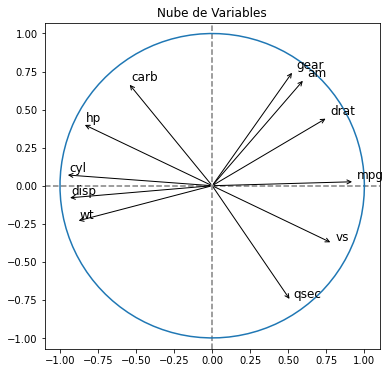

In [ ]:
def plot_correlation_circle(pc1, pc2, X):    
  fig, ax = plt.subplots(figsize=(6, 6))

  # para cada variable del dataframe
  for i in range(X.shape[1]):
    
    var = X.columns[i]
    # calculo de la correlacion entre las componentes y las variables
    x = np.corrcoef(pc1,X[var])[0,1]
    y = np.corrcoef(pc2,X[var])[0,1]
    # dibujo del vector
    ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
    ax.annotate(var, (x+0.02,y+0.02), size=12)

  # titulo y lineas (0,0)
  ax.set_title('Nube de Variables')
  ax.axhline(y=0, color="grey", linestyle="--")
  ax.axvline(x=0, color="grey", linestyle="--")

  # circulo
  an = np.linspace(0, 2 * np.pi, 100)
  plt.plot(np.cos(an), np.sin(an))

  plt.axis('equal')
  plt.show()
    
pc1 = principal_components[:,0]
pc2 = principal_components[:,1]
cars_coord = pd.DataFrame(pre_PCA_std, columns=mtcars.columns)

plot_correlation_circle(pc1,pc2,cars_coord)

## Grupos de variables que estan correlacionadas.

Dado que el **coseno del angulo de los vectores proyectados es igual al coeficiente de correlacion entre las variables** que originan dichos vectores, es sencillo reconocer en el grafico de la nube de variables grupos de variables que presenten una **relacion lineal** entre si -si los hay-. \
En este caso en particular, podemos identificar los grupos de **{cyl, disp, wt}**, (quiza incluso podriamos incluir a hp) y el de **{gear, am}**, la cercania de cada variable con las de su grupo nos permite concluir que la **correlacion entre dichas variables de grupo estara cerca del 1**. En otras palabras, un vehiculo que pese mucho probablemente tambien tendra un numero elevado de cilindros y una mayor cilindrada, de manera similar, un vehiculo que tenga una transmision manual tendera a tener mas marchas hacia adelante. \
Otra observacion a destacar es la del sentido opuesto -sobre el eje de la PC1- de la variable **mpg respecto de las del primer grupo mencionado**, lo que se traduce en una **correlacion cercana a -1**, y nos da una idea de la relacion inversa de esta variable con las del grupo, es decir, que un auto pesado, de mucha cilindrada y muchos cilindros tendra un valor bajo de millas por galon, es decir, sera un auto que consumira bastante combustible.


 

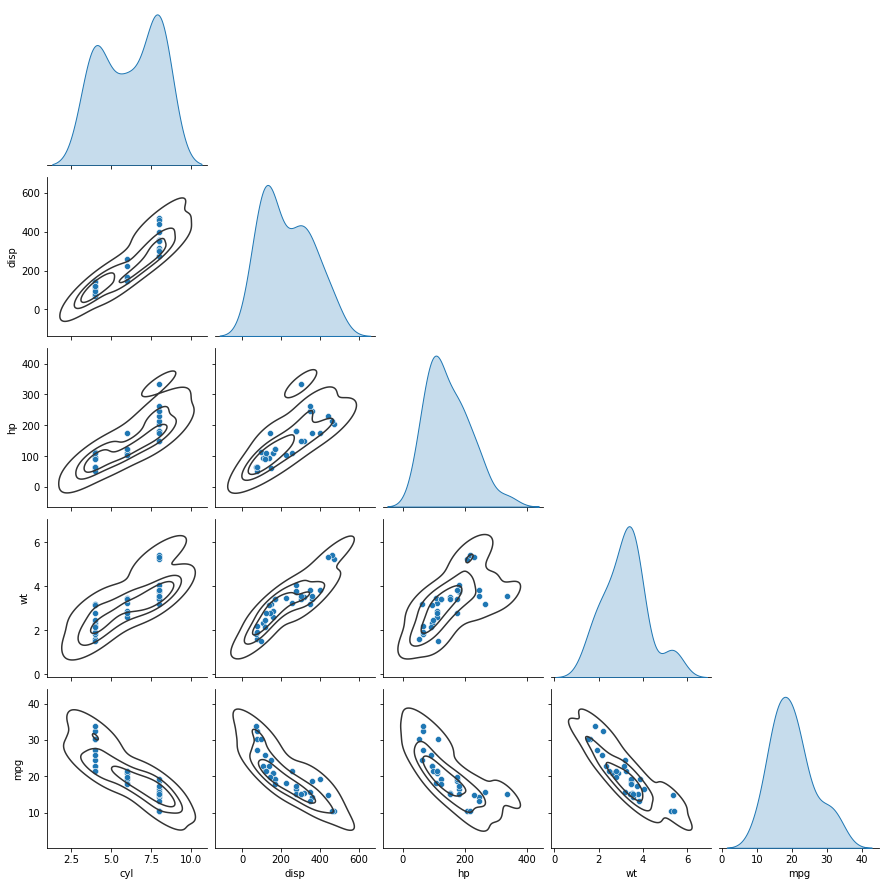

In [ ]:
g = sns.pairplot(data=cars_df, vars=['cyl','disp','hp','wt', 'mpg'], diag_kind="kde", corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

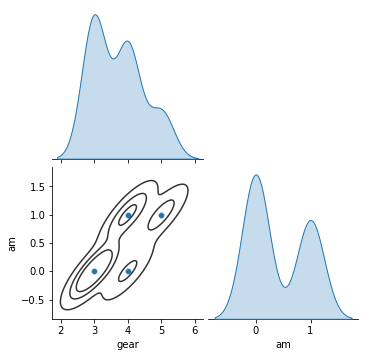

In [ ]:
g = sns.pairplot(data=cars_df, vars=['gear','am'], diag_kind="kde", corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")

La tendencia positiva es un indicativo mas de la correlacion (cercana a 1) entre las variables del grupo, para los dos grupos mencionados. \
Y la tendencia negativa en la ultima fila del primer grafico se condice con la correlacion (cercana a -1) de mpg con las variables del grupo 1.

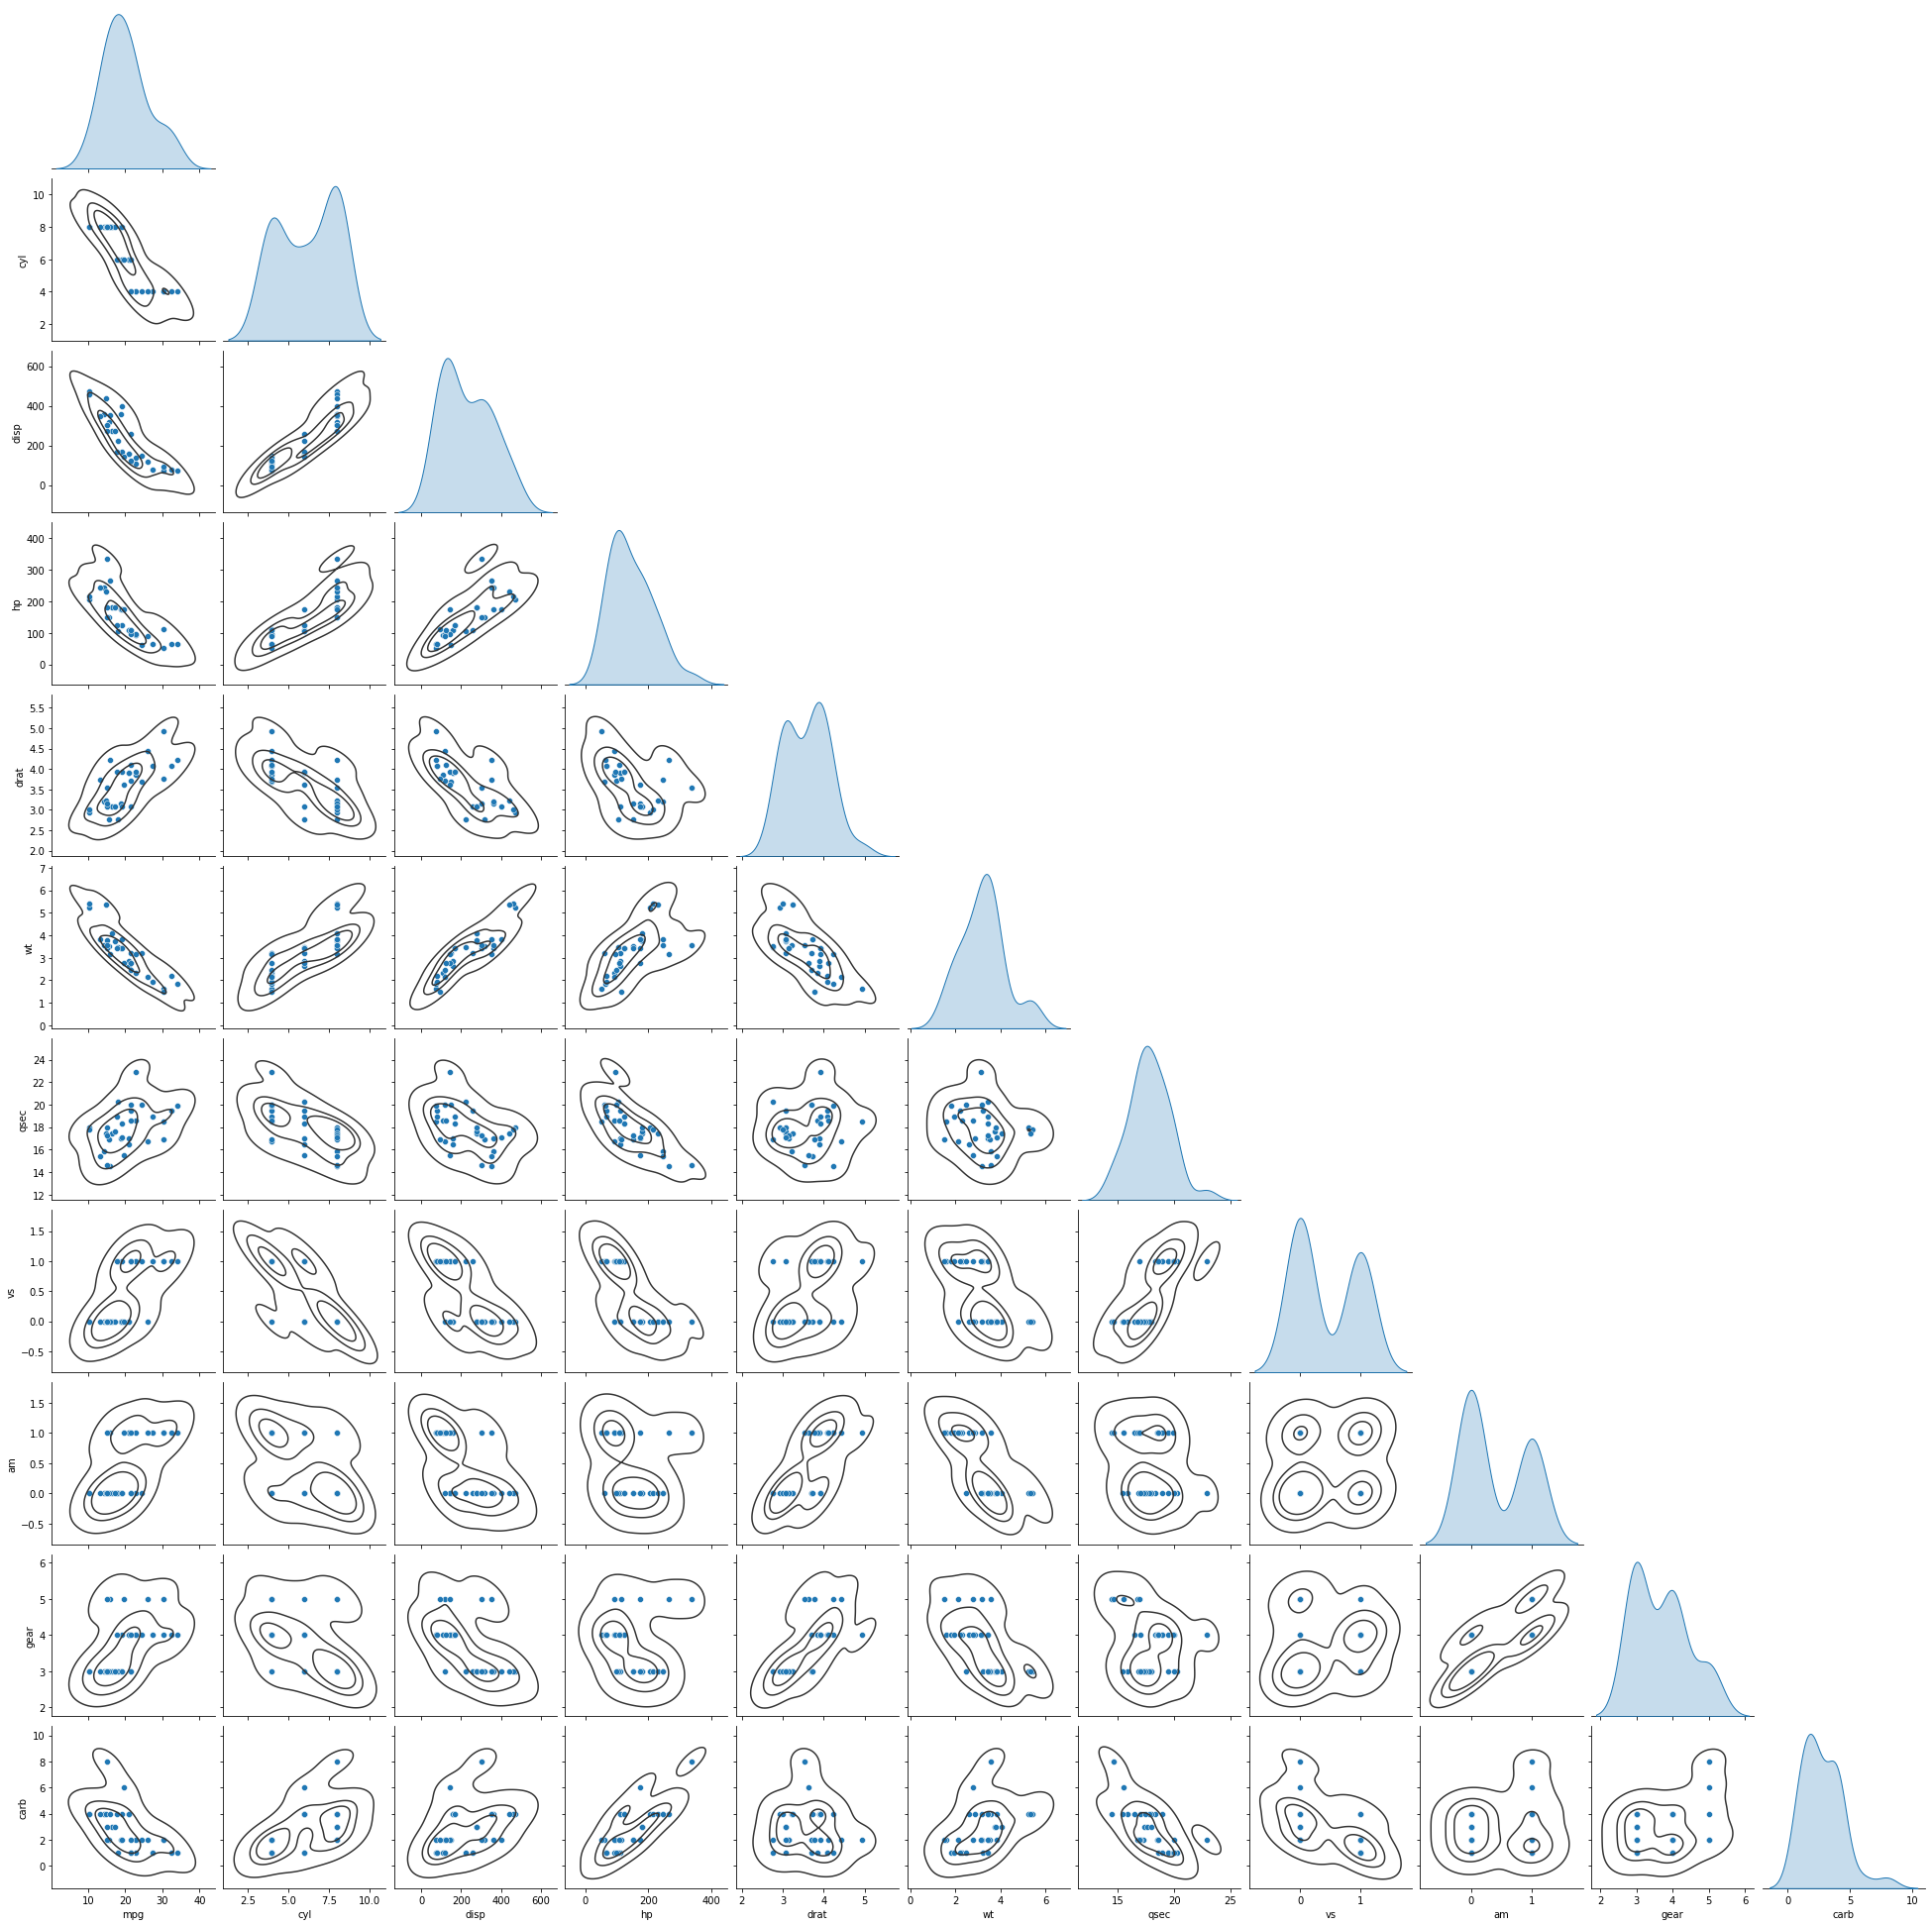

In [ ]:
g = sns.pairplot(cars_df, diag_kind="kde", corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")